In [1]:
import pandas as pd
from math import radians, sin, cos, sqrt, atan2
import numpy as np
from dateutil import parser
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import os
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [2]:

df = pd.read_csv('/Users/carlsonoranu/Downloads/Relevant Rain folder/Lagosflood_prediction_data.csv')

In [3]:
print(df.head(5))

   State        date  flood_occurance  tempmax  tempmin  temp  feelslikemax  \
0  Lagos  2009-01-01              0.0     34.1     25.1  28.2          37.4   
1  Lagos  2009-01-02              0.0     32.1     23.1  27.2          35.9   
2  Lagos  2009-01-03              0.0     33.1     23.1  26.9          36.7   
3  Lagos  2009-01-04              0.0     33.1     23.1  26.7          35.6   
4  Lagos  2009-01-05              0.0     33.1     23.1  27.2          38.2   

   feelslikemin  feelslike   dew  ...  severerisk              sunrise  \
0          25.1       30.6  24.0  ...         NaN  2009-01-01T06:57:27   
1          23.1       28.8  23.1  ...         NaN  2009-01-02T06:57:52   
2          23.1       28.4  23.1  ...         NaN  2009-01-03T06:58:17   
3          23.1       28.0  22.5  ...         NaN  2009-01-04T06:58:41   
4          23.1       29.6  23.4  ...         NaN  2009-01-05T06:59:05   

                sunset  moonphase        conditions  \
0  2009-01-01T18:42:45   

In [4]:

df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [5]:
# Fill  missing values 
df = df.fillna(method='ffill')


/var/folders/7v/g3ljy9ss23j81h_n13d80xtr0000gn/T/ipykernel_96552/3157259546.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


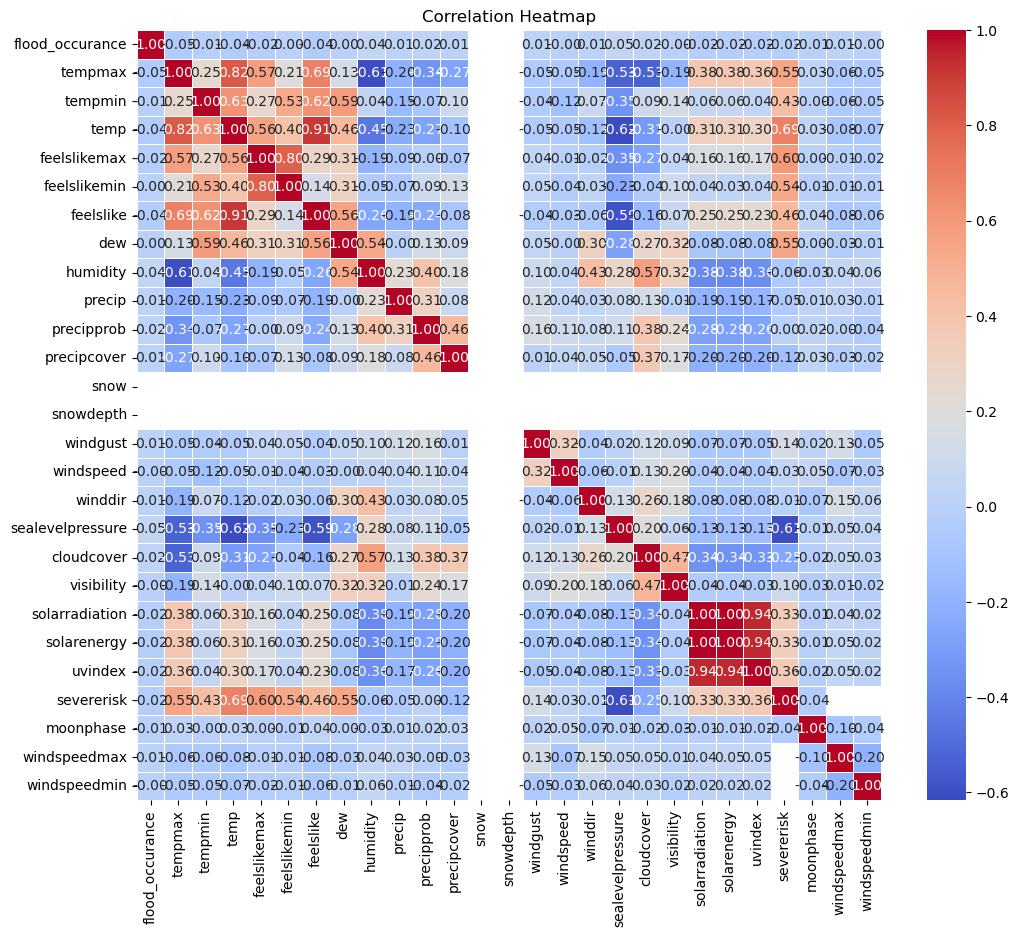

In [6]:
# Ensure 'flood_occurance' is binary
df['flood_occurance'] = df['flood_occurance'].apply(lambda x: 1 if x > 0 else 0)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heat map
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [7]:
# Drop the specified columns
columns_to_drop = ["State", "feelslikemax", "feelslikemin", "feelslike", "dew", "humidity", 
                   "precipprob", "preciptype", "snow", "snowdepth", "windgust", "windspeed", 
                   "winddir", "cloudcover", "visibility", "solarradiation", 
                   "solarenergy", "uvindex", "severerisk", "sunrise", "sunset", "conditions", 
                   "description", "icon", "stations", "windspeedmax", "windspeedmin"]
df = df.drop(columns=columns_to_drop)
print(df.head(5))

        date  flood_occurance  tempmax  tempmin  temp  precip  precipcover  \
0 2009-01-01                0     34.1     25.1  28.2     0.0          0.0   
1 2009-01-02                0     32.1     23.1  27.2     0.0          0.0   
2 2009-01-03                0     33.1     23.1  26.9     0.0          0.0   
3 2009-01-04                0     33.1     23.1  26.7     0.0          0.0   
4 2009-01-05                0     33.1     23.1  27.2     0.0          0.0   

   sealevelpressure  moonphase  
0            1010.8       0.17  
1            1011.7       0.20  
2            1011.8       0.24  
3            1011.4       0.25  
4            1011.4       0.31  


/var/folders/7v/g3ljy9ss23j81h_n13d80xtr0000gn/T/ipykernel_96552/3591583051.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


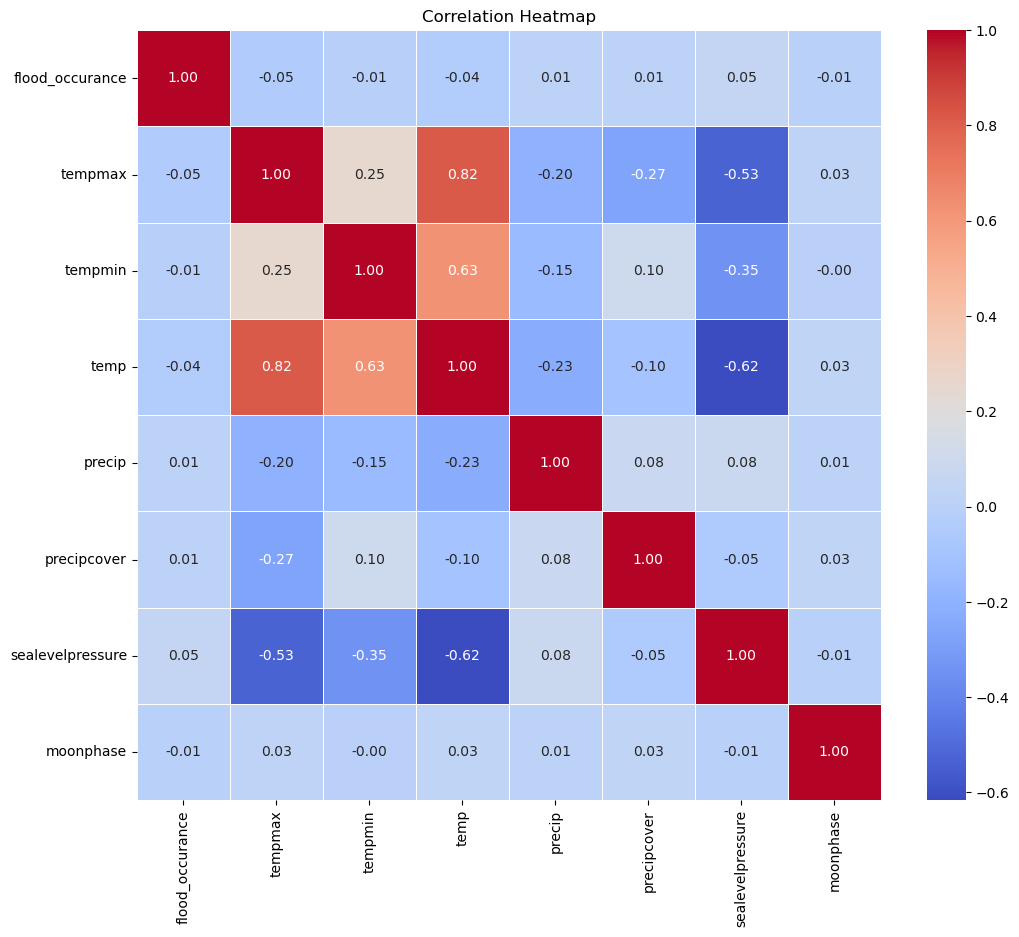

In [8]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heat map
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
# Define today's date
today = pd.to_datetime('2024-07-08')

In [10]:
# Split the data into training and future datasets
training_data = df[df['date'] <= today]
future_data = df[(df['date'] > today) & (df['date'] <= '2024-12-31')]

In [11]:

# Fill or drop missing values in both datasets
training_data = training_data.fillna(method='ffill')
future_data = future_data.fillna(method='ffill')

In [12]:

features = ['sealevelpressure', 'precip']
target = 'flood_occurance'

In [13]:

X_train = training_data[features]
y_train = training_data[target]

X_future = future_data[features]


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [14]:

future_data['flood_probability'] = model.predict_proba(X_future)[:, 1]


max_prob = future_data['flood_probability'].max()
predicted_dates = future_data[future_data['flood_probability'] == max_prob]['date']

if predicted_dates.empty:
    print("No flood predicted in the given period.")
else:
    print(f"Date(s) with the highest probability of flooding ({max_prob}):")
    for date in predicted_dates:
        print(date.strftime('%Y-%m-%d'))

Date(s) with the highest probability of flooding (0.0775):
2024-08-11
2024-08-17
2024-08-21
